In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import optim
import Data
from Data import CSVData

In [4]:
model_path = 'C:/Users/Abhi/Downloads/model_scripted4.pt'
model = torch.jit.load(model_path)
model.eval()

RecursiveScriptModule(
  original_name=Sequential
  (Linear0): RecursiveScriptModule(original_name=Linear)
  (Activation0): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear1): RecursiveScriptModule(original_name=Linear)
  (Activation1): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear2): RecursiveScriptModule(original_name=Linear)
  (Activation2): RecursiveScriptModule(original_name=LeakyReLU)
  (Linear_last): RecursiveScriptModule(original_name=Linear)
  (Activation_last): RecursiveScriptModule(original_name=LeakyReLU)
)

In [5]:
features = ['mode',
'Msim',
'Gsim',
'pz_in1', 
'pz_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'Mtarget',
'Gtarget',]
label = 'f_rwt'
features_to_rescale = ['Msim',
'Gsim',
'pz_in1', 
'pz_in2',
'px_out1',
'py_out1',
'pz_out1',
'e_out1',
'px_out2',
'py_out2',
'pz_out2',
'e_out2',
'px_out3',
'py_out3',
'pz_out3',
'e_out3',
'px_out4',
'py_out4',
'pz_out4',
'e_out4',
'Mtarget',
'Gtarget']

In [6]:
test_data = CSVData(batch_size=1024, features_name=features, labels_name=label, features_to_rescale= features_to_rescale, file_names=['C:/Users/Abhi/test_0.csv'])

In [7]:
X, Y = test_data.load_data_many()
inputs = torch.Tensor(np.array(X))
labels = torch.Tensor(np.log(np.array(Y)))

In [8]:
with torch.no_grad():
    test_out=model(inputs)

In [9]:
test_out = torch.reshape(test_out, [150000])

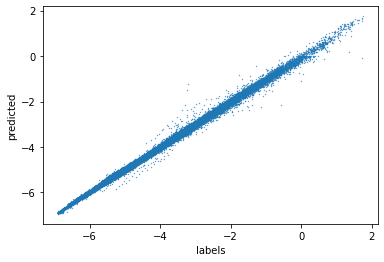

In [11]:
plt.scatter(labels, test_out, s=0.1)
plt.xlabel('labels')
plt.ylabel('predicted')
plt.show()

In [16]:
1-torch.mean(torch.abs((labels-test_out)/labels))

tensor(0.9789)